In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import geopandas as gpd

In [2]:
#sub: submission dataframe
#ref: dataset for test - evaluating the score
def score(sub, ref):
    total_distance = 0
    for date, c_lat, c_lon in ref[['datetime', 'latitude', 'longitude']].values:
        row = sub.loc[sub.date < date].tail(1) # Prior to Oct 2 this was incorrectly .head(1)
        dists = []
        for a in range(6):
            dist = ((c_lat - row[f'A{a}_Latitude'].values[0])**2+(c_lon - row[f'A{a}_Longitude'].values[0])**2)**0.5 
            dists.append(dist)
        total_distance += min(dists)
    return total_distance

In [3]:
data = pd.read_csv('../Data/Train.csv', parse_dates=['datetime'])
print(data.shape)
data.head()

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


### Crash per hours

In [4]:
crash_per_3H = data.resample('3H', on='datetime').latitude.count()

<AxesSubplot:xlabel='datetime'>

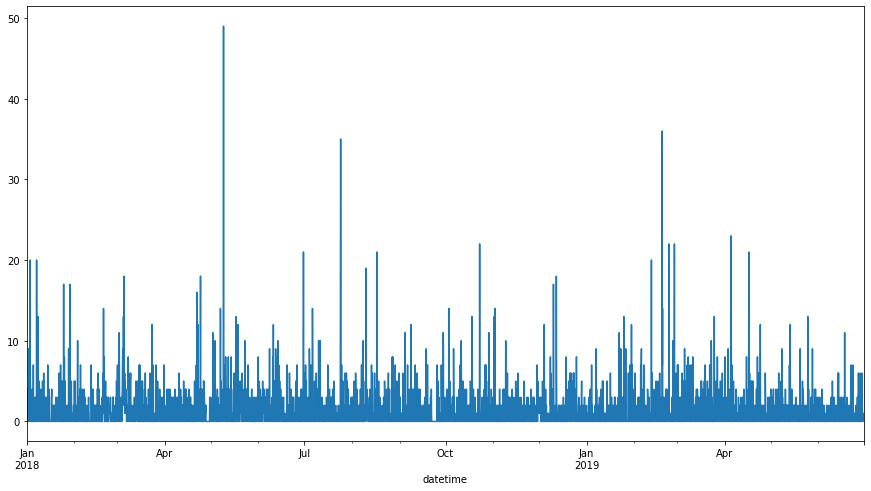

In [5]:
plt.figure(figsize=(15,8))
crash_per_3H.plot()

In [6]:
crash_per_3H.describe()

count    4367.000000
mean        1.446760
std         2.568858
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        49.000000
Name: latitude, dtype: float64

In [7]:
crash_per_3H.head()

datetime
2018-01-01 00:00:00    3
2018-01-01 03:00:00    4
2018-01-01 06:00:00    1
2018-01-01 09:00:00    4
2018-01-01 12:00:00    1
Freq: 3H, Name: latitude, dtype: int64

### Merging dataTrain and Weather

In [8]:
weather = pd.read_csv('../Data/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])

In [9]:
weather.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [10]:
weather[weather['Date'] == datetime.datetime(2018,1,1,0,0,0) ]

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.1,72.700005,0.00956,15.161493,-0.012186,-0.933914


In [11]:
data['date'] = [d.date() for d in data['datetime']]
data['time'] = [d.time() for d in data['datetime']]

In [12]:
weather['Date'].describe()

/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     731
unique                    731
top       2019-10-25 00:00:00
freq                        1
first     2018-01-01 00:00:00
last      2020-01-01 00:00:00
Name: Date, dtype: object

In [13]:
data['datetime'].describe()

/home/fikajy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6318
unique                   6243
top       2019-02-19 07:39:07
freq                        3
first     2018-01-01 00:25:46
last      2019-06-30 20:06:14
Name: datetime, dtype: object

In [14]:
new_weather = weather.rename(columns={'Date':'date'})

In [15]:
new_weather.head()

,date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [16]:
data['date'] = data['date'].astype('datetime64[ns]')

In [17]:
data_train = pd.merge(data, new_weather, how='left', on='date')

In [18]:
data_train

,uid,datetime,latitude,longitude,date,time,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,1,2018-01-01 00:25:46,-1.188850,36.931382,2018-01-01,00:25:46,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2,2018-01-01 02:02:39,-0.662939,37.208730,2018-01-01,02:02:39,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
2,3,2018-01-01 02:31:49,-0.662939,37.208730,2018-01-01,02:31:49,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
3,4,2018-01-01 03:04:01,-1.288087,36.826583,2018-01-01,03:04:01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
4,5,2018-01-01 03:58:49,-1.188850,36.931382,2018-01-01,03:58:49,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
...,...,...,...,...,...,...,...,...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540,2019-06-29,18:52:44,23.600000,87.400002,0.010870,14.340265,-0.090295,-0.085813
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449,2019-06-30,09:57:44,21.200001,82.400002,0.009969,14.003229,0.100334,0.375518
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248,2019-06-30,12:02:14,21.200001,82.400002,0.009969,14.003229,0.100334,0.375518
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518,2019-06-30,16:59:14,21.200001,82.400002,0.009969,14.003229,0.100334,0.375518


In [19]:
data_train.drop(['date','time'], axis=1, inplace=True)

### Test Linear regression 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
columns = ['datetime',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground']

In [22]:
data_train = data_train.dropna(axis=0)

In [23]:
Y = data_train[['longitude', 'latitude']]

In [24]:
X = data_train[columns]

In [25]:
X = X.set_index('datetime')

In [26]:
Y.isna().sum(), X.isna().sum()

(longitude    0
 latitude     0
 dtype: int64,
 precipitable_water_entire_atmosphere    0
 relative_humidity_2m_above_ground       0
 specific_humidity_2m_above_ground       0
 temperature_2m_above_ground             0
 u_component_of_wind_10m_above_ground    0
 v_component_of_wind_10m_above_ground    0
 dtype: int64)

In [27]:
model = LinearRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.predict(X_test.iloc[0:5])

array([[36.85348371, -1.26632064],
       [36.85087319, -1.27146953],
       [36.85214204, -1.27236041],
       [36.85575406, -1.27323096],
       [36.85102581, -1.26696073]])

In [31]:
y_test.iloc[0:5]

,longitude,latitude
1319,36.855262,-1.256402
1526,37.032573,-1.057696
2182,36.907635,-1.211500
2,37.208730,-0.662939
5771,36.852822,-1.326821


In [32]:
data['longitude'].std()

0.11286553478722937

In [33]:
data['latitude'].std()

0.12515698679171255

In [34]:
road_surveys = pd.read_csv('../Data/Segment_info.csv')

In [35]:
road_surveys

,segment_id,side,25_48,79_76,79_65,79_39,28_78_50,55_90,26_76,92_30,...,80_97_61_65_11,80_97_61_65_12,80_97_61_65_15,80_97_61_65_16,80_97_61_39_0,80_97_61_39_10,80_97_61_39_11,80_97_61_39_12,80_97_61_39_15,80_97_61_39_16
0,176_2,1,3,0,3,3,0.0,11,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,176_2,2,3,0,3,3,0.0,11,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,95_1,1,3,0,3,3,0.0,14,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95_1,2,3,0,3,3,0.0,14,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144_7,1,1,0,4,3,0.0,5,0,3,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,201_3,2,1,0,3,3,1.0,4,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1531,620_4,1,3,0,4,4,0.0,16,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1532,620_4,2,3,0,4,4,0.0,16,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1533,47_3,1,1,0,3,3,0.0,6,0,1,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
road_segment_locs = gpd.read_file('../segments_geometry.geojson')

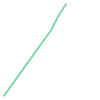

In [37]:
road_segment_locs['geometry'][1]

In [38]:
pd.set_option("max_r", 228)
road_surveys[road_surveys['segment_id'] == '75_1'].transpose()

""
segment_id
side
25_48
79_76
79_65
79_39
28_78_50
55_90
26_76
92_30


<AxesSubplot:>

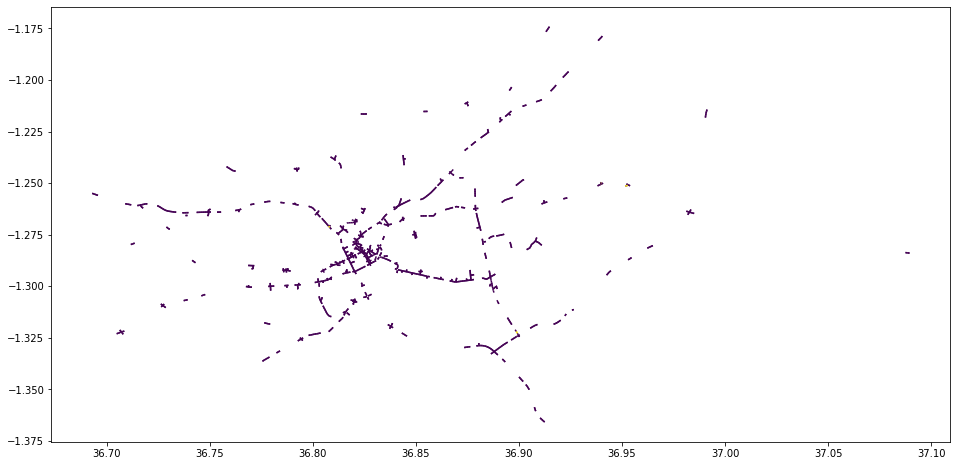

In [39]:
segments_merged = pd.merge(road_segment_locs, road_surveys, on='segment_id', how='left')
segments_merged.plot(column='63_65_16', figsize=(20, 8))

In [40]:
segments_merged

,segment_id,road_name,geometry,side,25_48,79_76,79_65,79_39,28_78_50,55_90,...,80_97_61_65_11,80_97_61_65_12,80_97_61_65_15,80_97_61_65_16,80_97_61_39_0,80_97_61_39_10,80_97_61_39_11,80_97_61_39_12,80_97_61_39_15,80_97_61_39_16
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284...",1,1,0,4,4,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284...",2,1,0,4,4,0.0,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283...",1,1,0,4,4,0.0,5,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283...",2,1,0,4,4,0.0,5,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282...",1,1,0,4,4,0.0,5,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263...",2,1,0,4,4,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263...",1,1,0,4,4,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263...",2,1,0,4,4,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1533,271_4,waiyaki way-trunk,"LINESTRING (36.73280 -1.26402, 36.73285 -1.264...",1,1,0,4,4,0.0,4,...,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0


In [41]:
c = np.sort(segments_merged['segment_id'].apply(lambda x: int(x.split('_')[0])).unique())

In [42]:
a = pd.Series(segments_merged.columns[4:]).apply(lambda x: x.split('_'))

In [43]:
b = []
for x in list(a.values):
    b += x


In [44]:
segment = road_segment_locs['geometry'].apply(lambda x: np.array(x)).values

### Recherche du segment le plus proche d'une location

In [53]:
def getNeighbourSegment(location, segments):
    result = 0
    dists = []
    for segment in segments:
        dist = []
        for loc in segment:
            d = ((location[0] - loc[0])**2 + (location[1] - location[1])**2)**0.5
            dist.append(d)
        dists.append(min(dist))
    return np.argmin(dists), segments[np.argmin(dists)]

In [54]:
segments =  [s.tolist() for s in segment]

In [55]:
getNeighbourSegment([36.82604954936898, -1.284444101379869], segments)

(0,
 [[36.8260292, -1.2844709],
  [36.82604954936898, -1.284444101379869],
  [36.82607659422822, -1.284408485292231],
  [36.82610363908745, -1.284372869204592],
  [36.82613068394668, -1.284337253116954],
  [36.82615772880592, -1.284301637029317],
  [36.82618477366515, -1.284266020941681],
  [36.826211818524385, -1.284230404854043],
  [36.826238863383615, -1.284194788766405],
  [36.82626590824285, -1.284159172678767],
  [36.82629295310208, -1.284123556591129],
  [36.826319262976725, -1.284087419110355],
  [36.82634394088594, -1.284050123924252],
  [36.82636861879516, -1.28401282873815],
  [36.82639329670437, -1.283975533552048],
  [36.826417974613584, -1.283938238365946],
  [36.82644161135365, -1.283900297970969],
  [36.82646402598816, -1.283861600241459],
  [36.82648644062267, -1.283822902511947],
  [36.82650885525718, -1.283784204782435],
  [36.826531269891696, -1.283745507052925],
  [36.826555607177916, -1.283708049463544]])

In [48]:
getSegment([36.82634, -1.284050123924252], segments)

NameError: name 'getSegment' is not defined